In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [35]:
dataset = pd.read_csv('Datasets/Wine.csv')

<Axes: >

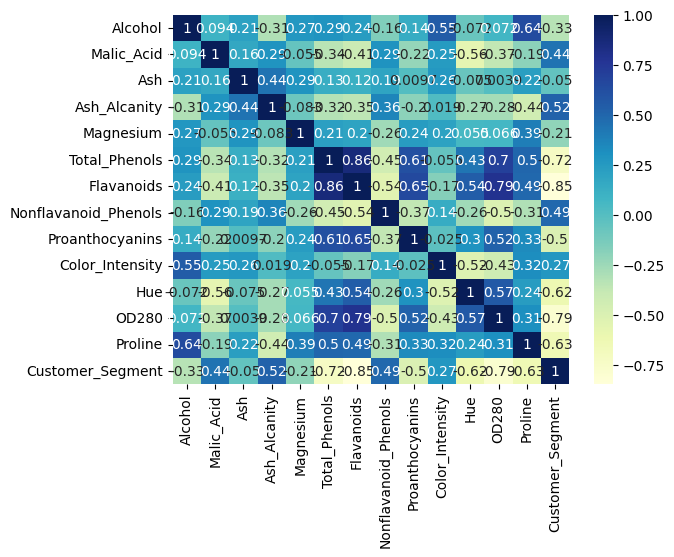

In [36]:
sns.heatmap(data=dataset.corr(), annot=True, cmap='YlGnBu')

In [37]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
classifier = LogisticRegression(random_state = 21)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_pred)          
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [43]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [44]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

/tmp/ipykernel_24814/611606359.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('white', 'brown', 'darkblue'))(i), label = j)


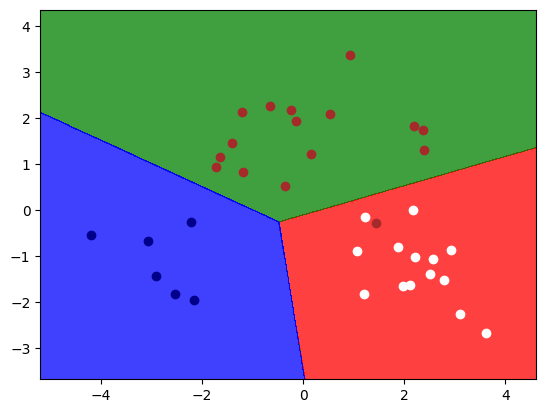

In [58]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('white', 'brown', 'darkblue'))(i), label = j)